Learn to predict the number of real solutions of the tritangent circles to three conics.

In [68]:
#TODO inspect predictions
#TODO check distribution of real counts in training data
#TODO ???

#TODO man bekommt nicht immer zwei weitere Lösungen!!
#TODO R18 -> R2 svd plot ral count

In [2]:
import matplotlib.pyplot as plt
import tensorflow.keras as keras
from keras import regularizers
import pandas as pd
import numpy as np

Using TensorFlow backend.


In [3]:
# Import Data
path = '/Users/las/Documents/GitHub/REU/hill_climb_w_solution_counts.xlsx'
df = pd.read_excel(path)

batch_1 = df[[col for col in df.columns if col[0].isupper()]].rename(str.lower, axis='columns')
# batch_2 = df[[col for col in df.columns if col[0].islower()]].rename(str.lower, axis='columns')
# batch_2.insert(0, "counts", np.array(batch_1['counts']) - 2)
# batch_2[batch_2['counts'] < 0] = 0
data = batch_1 # .append(batch_2).reset_index().drop('index', axis=1)

In [4]:
data.sample()

,a1,a2,a3,a4,a5,a6,b1,b2,b3,b4,b5,b6,c1,c2,c3,c4,c5,c6,counts
63725,0.20291,0.389189,0.149665,0.206758,0.789219,0.166932,0.261759,-0.493443,-0.074556,0.154544,0.59383,0.182157,0.030863,0.071575,0.067163,0.178876,0.678495,0.796399,46


In [5]:
# Create Training and Validation Data
count = np.array(data['counts'].values.tolist(), dtype=np.int)
param = np.array(data.drop('counts', axis=1).values.tolist(), dtype=np.float64)
n = int(0.8*len(count))

count_train, count_val = count[:n], count[n:]
param_train, param_val = param[:n], param[n:]

/Users/las/opt/anaconda3/envs/REU/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [25]:
# Set Up Network Architecture
model = keras.Sequential([
    keras.layers.Dense(units=1000, activation='relu', input_shape=(18,)),
    keras.layers.Dense(units=1000, activation='relu'),
    keras.layers.Dense(units=136, activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1000)              19000     
_________________________________________________________________
dense_4 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dense_5 (Dense)              (None, 136)               136136    
Total params: 1,156,136
Trainable params: 1,156,136
Non-trainable params: 0
_________________________________________________________________


In [72]:
sce = keras.losses.SparseCategoricalCrossentropy()
callback = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)
model.compile(optimizer='Adam', 
              loss=sce,
              metrics=['accuracy', sce],
              callbacks=[callback])

In [73]:
# Train model
history = model.fit(param_train,
                    count_train,
                    verbose=2,
                    epochs=100,
                    batch_size=64,
                    validation_data=(
                        param_val,
                        count_val
                    )
)

Train on 80000 samples, validate on 20000 samples
Epoch 1/100
80000/80000 - 73s - loss: 0.1691 - accuracy: 0.9679 - sparse_categorical_crossentropy: 0.1691 - val_loss: 0.1175 - val_accuracy: 0.9873 - val_sparse_categorical_crossentropy: 0.1174
Epoch 2/100
80000/80000 - 100s - loss: 0.1206 - accuracy: 0.9782 - sparse_categorical_crossentropy: 0.1206 - val_loss: 0.1144 - val_accuracy: 0.9876 - val_sparse_categorical_crossentropy: 0.1143
Epoch 3/100


[]

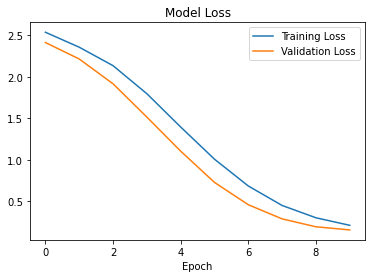

In [ ]:
# Graphs
fig = plt.figure()
plt.title('Model Loss')
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss'])
plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel('Epoch')
plt.plot()

[]

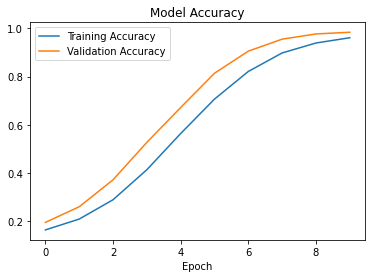

In [ ]:
# Graphs
fig = plt.figure()
plt.title('Model Accuracy')
plt.plot(history.history['accuracy']) 
plt.plot(history.history['val_accuracy'])
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.xlabel('Epoch')
plt.plot()

In [ ]:
keras.models.save_model(model, "model_1000_1000_136_v3.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
model = keras.models.load_model("model_1000_1000_136_v2.h5")

AttributeError: 'str' object has no attribute 'decode'

In [ ]:
data = data.drop('prediction', axis=1)
predictions = np.argmax(model.predict(param), axis=1)
data.insert(19, 'predictions', predictions)

<AxesSubplot:>

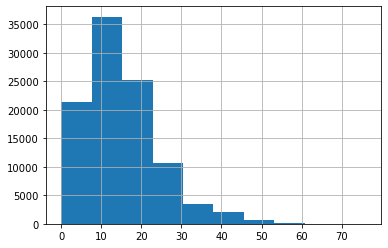

In [ ]:
data.counts.hist()

<AxesSubplot:>

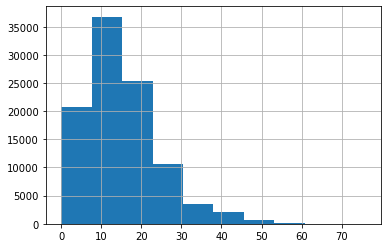

In [ ]:
data.predictions.hist()